In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import sys
today = str(datetime.datetime.now().date())
print(today)
%matplotlib inline

2017-10-19


In [2]:
#https://finance.google.com/finance/getprices?q=HM-B&p=10d&f=d,o,h,l,c,v
#http://finance.google.com/finance/getprices?q=OMXS30&x=INDEXNASDAQ&p=2Y&i=86400&f=d,o,h,l,c,v

CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
ROOT =  os.path.join(CURR_PATH)
sys.path.append(os.path.join(ROOT,'modules'))

import stocks as stocks
import style as style
style.set_style()

Style set


In [3]:
# OMXS30 Data
# ['ALIV-SDB','NCC-B','LUMI-SDB','THULE','HM-B','VOLV-B','BOL','GETI-B','SKA-B','AZN']
#Quotes = ['OMXS30']
#exchange = 'INDEXNASDAQ'
exchange = 'STO'
Quotes = ['VOLV-B','HM-B']
period_length = 1
period = 'Y'
interval_min = 2
interval_sec = 60*interval_min
df, url_string = stocks.GoogleIntradayQuote(Quotes,interval_sec,period_length,period,exchange)
print(df.head())
from_date = str(df['datetime'].min().date())
to_date = str(df['datetime'].max().date())
days = np.busday_count(from_date,to_date)+1
print('ticks:',df.shape[0])
print('from:', from_date)
print('to:', to_date)
print('days:', days)

http://finance.google.com/finance/getprices?q=VOLV-B&x=STO&p=1Y&i=120&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=HM-B&x=STO&p=1Y&i=120&f=d,o,h,l,c,v
             datetime   stock   open   high    low  close   volume
0 2017-09-08 09:02:00  VOLV-B  147.0  147.3  147.0  147.3  41222.0
1 2017-09-08 09:04:00  VOLV-B  147.2  147.2  147.0  147.1  39781.0
2 2017-09-08 09:06:00  VOLV-B  147.0  147.2  147.0  147.2  20618.0
3 2017-09-08 09:08:00  VOLV-B  147.2  147.2  147.2  147.2   5711.0
4 2017-09-08 09:10:00  VOLV-B  147.2  147.2  147.1  147.1   8259.0
ticks: 14882
from: 2017-09-08
to: 2017-10-19
days: 30


In [4]:
filename = 'quote='
for Quote in Quotes:
    filename = filename+Quote
filename = filename+'&start='+from_date+'&end='+to_date+'&interval='+str(interval_min)+'min'
print(filename)
df.to_pickle(os.path.join('data',filename+'.pkl'))

quote=VOLV-BHM-B&start=2017-09-08&end=2017-10-19&interval=2min


datetime  open  high   low  close  volume
stock                                            
HM-B        7569  7569  7569  7569   7569    7569
VOLV-B      7313  7313  7313  7313   7313    7313

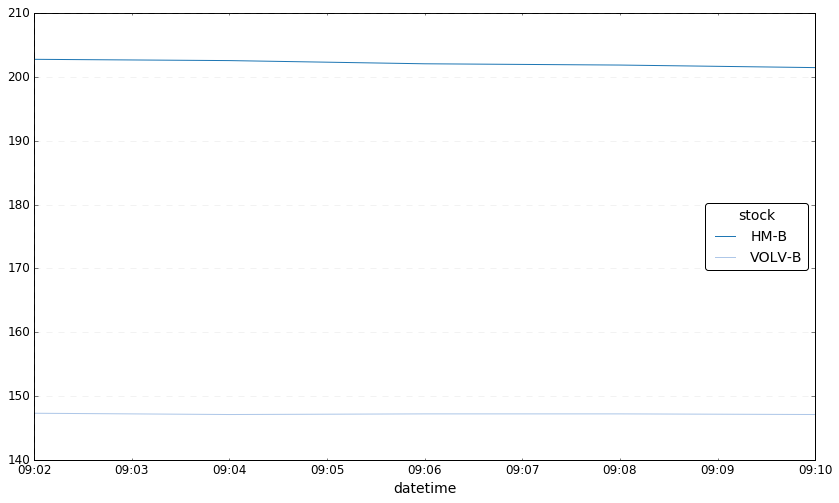

In [7]:
df[['datetime','stock','close']].groupby(['datetime','stock'])['close'].sum().unstack().head().plot(grid = True)
df.groupby('stock').count()